In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install "dask[dataframe]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import sys
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
#sys.path.insert(0, '/global/homes/x/xzheng/python_lib/')
from netCDF4 import Dataset
import matplotlib as mpl 
import matplotlib.colors as colors
# #os.environ['PROJ_LIB'] = r'/global/cfs/cdirs/e3sm/xzheng/conda/pkgs/proj-7.2.0-h277dcde_2/share/'
# from mpl_toolkits.basemap import Basemap
# import cartopy.crs as ccrs
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from sklearn import preprocessing
from statistics import mean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
norm_data = pd.read_csv("/content/drive/MyDrive/Private/Image_Similarity/daily_trans_norm.csv")
norm_data = norm_data.iloc[:,1:]
norm_data

,"sst(33.0,-33.0)","sst(33.25,-33.0)","sst(33.5,-33.0)","sst(33.75,-33.0)","sst(34.0,-33.0)","sst(34.25,-33.0)","sst(34.5,-33.0)","sst(34.75,-33.0)","sst(35.0,-33.0)","sst(35.25,-33.0)",...,"t2m(40.75,-23.0)","t2m(41.0,-23.0)","t2m(41.25,-23.0)","t2m(41.5,-23.0)","t2m(41.75,-23.0)","t2m(42.0,-23.0)","t2m(42.25,-23.0)","t2m(42.5,-23.0)","t2m(42.75,-23.0)","t2m(43.0,-23.0)"
0,0.248875,0.251932,0.218729,0.167344,0.118699,0.098418,0.119796,0.130408,0.137461,0.151515,...,0.195031,0.185714,0.178300,0.172120,0.154563,0.143675,0.146293,0.156671,0.173913,0.195476
1,0.258726,0.279664,0.243431,0.190116,0.138874,0.113119,0.128353,0.133286,0.145086,0.164616,...,0.258879,0.255773,0.257252,0.258178,0.246343,0.243416,0.248745,0.258991,0.272482,0.286063
2,0.240647,0.263094,0.258533,0.200309,0.129656,0.091264,0.112380,0.124466,0.145409,0.160901,...,0.305736,0.299503,0.298483,0.299952,0.292361,0.286533,0.292380,0.303016,0.319956,0.337499
3,0.231958,0.249908,0.245128,0.200603,0.139170,0.103339,0.122608,0.121866,0.135114,0.140948,...,0.317938,0.310188,0.307004,0.307721,0.296770,0.288846,0.293899,0.300969,0.313605,0.326212
4,0.240659,0.253754,0.254654,0.216030,0.147427,0.101359,0.117548,0.113391,0.130282,0.147317,...,0.190143,0.187680,0.188425,0.187565,0.173116,0.169735,0.179430,0.190691,0.204625,0.221670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.170362,0.195766,0.172818,0.148430,0.143035,0.143919,0.163318,0.165375,0.199486,0.198513,...,0.588905,0.596098,0.604630,0.610445,0.609013,0.611670,0.610786,0.610492,0.609527,0.605396
361,0.173955,0.173547,0.146952,0.128510,0.125444,0.131113,0.152947,0.146213,0.165096,0.172293,...,0.638205,0.640849,0.647078,0.652708,0.654178,0.660341,0.666815,0.674768,0.679556,0.680521
362,0.144499,0.150466,0.120698,0.119222,0.124984,0.127509,0.144510,0.136401,0.158643,0.165772,...,0.546835,0.536497,0.529859,0.526351,0.516071,0.514323,0.518746,0.529035,0.539390,0.548580
363,0.138749,0.139381,0.115668,0.107025,0.106621,0.110516,0.127423,0.116608,0.135778,0.153602,...,0.459513,0.459345,0.463261,0.470769,0.470468,0.471274,0.475541,0.480568,0.486444,0.492528


In [5]:
def pca1(data,n): # data is data to be input , n is the number of components 
  pca = PCA(n_components=n) 
  pca.fit(data)

  # Get pca scores
  pca_scores = pca.transform(data)

  # Convert pca_scores to a dataframe
  scores_df = pd.DataFrame(pca_scores)

  # Round to two decimals
  scores_df = scores_df.round(2)

  # Return scores
  return scores_df

In [6]:
norm_data = pca1(norm_data, 11)

In [7]:
#path2 = ('/content/drive/MyDrive/Data/mock.nc')
#path2 = ('/content/drive/MyDrive/Private/Image_Similarity/mock1.nc')
#path2 = ('/content/drive/MyDrive/Data/mock_v2.nc')
#path2 = ('/content/drive/MyDrive/Data/mock_v2.1.nc')
#path2 = ('/content/drive/MyDrive/Data/mock_v3.nc')
#path2 = ('/content/drive/MyDrive/Data/mock_v3.1.nc')
#path2 = ('/content/drive/MyDrive/Data/mock_v4.nc')
path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_daily_smalldomain.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly.nc')
#path2 = ('/content/drive/MyDrive/Data/ERA5_meteo_sfc_2021_hourly_smalldomain.nc')
data = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
#data = xr.open_dataset(path2)# decode_times=False) #To view the date as integers of 0, 1, 2,....
#data5 = xr.open_dataset(path2) # To view time in datetime format
data

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

In [8]:
def null_fill(input):

  dask_df = input.to_dask_dataframe(dim_order=None, set_index=False)
  pd_df = dask_df.compute()
  pd_df1 = pd_df.iloc[:, 3:]
  df2 = pd_df1[pd_df1.isnull().any(axis=1)]
  lst = list(df2.index.values)
  df2.loc[:] = np.nan
  dt = pd.concat([pd_df1, df2], axis=0)
  dt3 = dt[~dt.index.duplicated(keep='last')]
  dt4 = dt3[['sst', 'sp', 'u10', 'v10', 'sshf', 'slhf', 't2m']]
  pd_df4 = pd_df.iloc[:, 0:5]
  dff = pd_df4[['time', 'longitude', 'latitude', 'sst']]
  df = pd.merge(dff, dt4, left_index=True, right_index=True).drop('sst_y', axis=1)
  df.rename(columns={'sst_x':'sst'}, inplace=True)
  df_rows = pd.DataFrame(df).set_index(["time", "longitude", "latitude"])
  data = xr.Dataset.from_dataframe(df_rows)
  df_rows = pd.DataFrame(df).set_index(["time", "longitude", "latitude"])
  data = xr.Dataset.from_dataframe(df_rows)

  return data

In [9]:
def datatransformation(data):
        dask_df = data.to_dask_dataframe(dim_order=None, set_index=False)
        pd_df = dask_df.compute()

        for i in pd_df.columns:
          if pd_df[i].isna().sum() > 0:
            pd_df[i].fillna(value=pd_df[i].mean(), inplace=True)
        
        #col = 'time','lat','lon'
        col = 'time','latitude','longitude'
        fin_df = pd_df.loc[:, ~pd_df.columns.isin(col)]

        trans_data = pd.DataFrame()
        for j in fin_df.columns:
          for i in range(0,pd_df.shape[0]):
              c=(j + '(' + str(pd_df.latitude[i])+','+str(pd_df.longitude[i]) + ')')
              trans_data.loc[pd_df.time[i], c] = pd_df[j][i]

        return trans_data

def datanormalization(input):
  x = input.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  trans_data = pd.DataFrame(x_scaled, columns=input.columns, index=input.index)
        
  return trans_data

In [10]:
def pca1(data,n): # data is data to be input , n is the number of components 
  pca = PCA(n_components=n) 
  pca.fit(data)

  # Get pca scores
  pca_scores = pca.transform(data)

  # Convert pca_scores to a dataframe
  scores_df = pd.DataFrame(pca_scores)

  # Round to two decimals
  scores_df = scores_df.round(2)

  # Return scores
  return scores_df

In [13]:
# !pip install "dask[dataframe]" Needed for data transformation

import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering




  #Initialize parameters
  
K = int(input("Enter your desired number of clusters: "))

proximity = input("Enter your desired proximity metric(default is euclidean) : ")

link = input("Enter desired linkage criteria(from single, average, complete, ward), default is average: ")

components = int(input("Enter desired number of principal components: "))

replace = input("Would you like to replace values where there is land to null values\n")

def spatial_agglomerative(input):
  '''
  input: 
        datatype: 4-D spatio-temporal xarray

        n_clusters: The number of our desired clusters

        affinity: The distance or proximity metric used (euclidean in most cases)

        linkage: Linkage criteria

  Output:
         
        formed_clusters: 1-D array of cluster labels classifying each data point along the time dimension
                         to a cluster label

        A dataframe showing each cluster label and the correcponding cluster size.
     
  '''

  #calling function that inputs null values
 

  if replace == "yes":

    input = null_fill(input)

    #calling function that transforms our data
    trans_data = datatransformation(input)

    #Normalize data
    norm_data = datanormalization(trans_data)

    #calling function that reduces the dimension
    norm_data = pca1(norm_data, components)
  else:
    #calling function that transforms our data
    trans_data = datatransformation(input)

    #Normalize data
    norm_data = datanormalization(trans_data)

    #calling function that reduces the dimension
    norm_data = pca1(norm_data, components)
 

  # calling the agglomerative algorithm and choosing n_clusters = 4 based on elbow value
  model = AgglomerativeClustering(n_clusters = K, affinity = proximity, linkage = link)
  
  # training the model on transformed data
  y_model = model.fit(norm_data)
  labels = y_model.labels_
  
  # # creating pandas dataframe on transformed data
  # df2 = norm_data.time_step
  # df1 = pd.DataFrame(df2, columns=['index'])
  # df1['clusterid'] = labels
  
  # #df1["cluster"] = cluster.labels_
  # df1['clusterid'].value_counts()


  df1 = pd.DataFrame(norm_data)
  df1['Cluster'] = labels
  df1['Cluster'].value_counts()
  #print("Estimated number of clusters: %d" % n_clusters_)
  print(df1['Cluster'].value_counts())

  # graph size
  plt.figure(1, figsize = (24 ,12))

  # creating the dendrogram
  dendrogram = sch.dendrogram(sch.linkage(norm_data, method  = "ward"))

  plt.axhline(y = 85, color='orange', linestyle ="--")

  # var = list(input.variables)
  var = list(data.variables)

  # ploting graphabs
  plt.title('Dendrogram')
  plt.xlabel(var)
  plt.ylabel('Euclidean distances')
  plt.show()
  
  return df1,labels

Enter your desired number of clusters: 5
Enter your desired proximity metric(default is euclidean) : euclidean
Enter desired linkage criteria(from single, average, complete, ward), default is average: average
Enter desired number of principal components: 11
Would you like to replace values where there is land to null values
no


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


0    169
4    164
1     15
2     13
3      4
Name: Cluster, dtype: int64


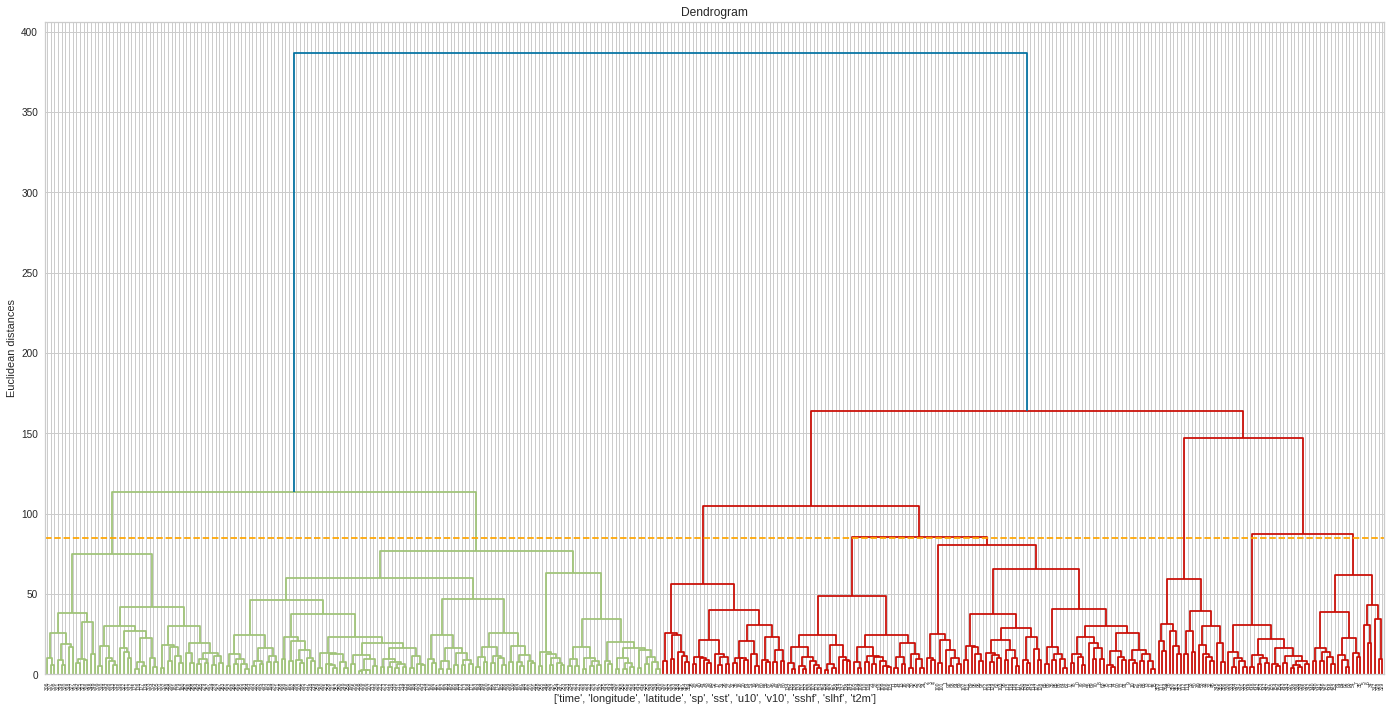

(         0      1      2      3     4     5     6     7     8     9    10  \
 0    14.33   5.61  -5.20  12.19 -0.83 -4.53  0.69  0.90  1.89 -0.47  0.59   
 1    14.96  -1.52  -2.36  18.39  0.19 -4.07 -1.76  3.10  3.02  2.23  2.07   
 2    15.53  -8.95   1.69  21.77 -4.87 -2.27 -1.10  4.25  2.16  4.45  1.60   
 3    16.39 -10.86   3.87  17.92 -7.86 -1.18 -4.86  3.57 -3.84  2.27 -1.04   
 4    16.73  -6.24   7.23  21.99 -7.49 -5.32 -5.21  4.90 -1.47  1.19 -0.08   
 ..     ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   
 360  10.06 -20.98  -2.60  -1.21  4.15  2.41 -4.87  1.23  4.59  0.71 -1.23   
 361  10.80 -25.95  -5.39   2.16  4.05  2.24 -0.61  0.83  6.88  0.01 -0.28   
 362  14.40 -18.95   8.91   2.61  4.53  2.37  2.83  3.11  2.04 -3.15  3.05   
 363  16.30 -20.41  15.44   6.12  5.51  2.67 -0.93 -0.06  1.74 -0.47  3.70   
 364  16.66 -14.68  22.66  -0.07  2.30  3.26  1.57 -1.54  2.79  1.70  3.04   
 
      Cluster  
 0          4  
 1          4  
 2          4 

In [14]:
# spatial_agglomerative(norm_data, n_clusters = K, affinity = proximity, linkage = link)
# spatial_agglomerative(norm_data, n_clusters = 7, affinity = euclidean, linkage = average)
spatial_agglomerative(data)